# TO BE UPDATED: NYC Taxi Trip Records Analysis Using Machine Learning algrithms

“Cities are not born smart. They become smart by understanding what is happening on their streets.” – New York City Taxi and Limousine Commission (TLC).

TLC is an agency of the New York City government that licenses and regulates the medallion taxis and for-hire vehicle industries, including app-based companies. Therefore, major trends in the taxi and for-hire vehicle industry are highlighted in TLC records and they are public available.

* What transportation data does TLC collect?

* Why collects data?

To understand traffic patterns, working conditions, vehicle efficiency, service availability, distinguish new business opportunities… 


## 1) About the data

* The data set is publically available for free on NYC.gov
* I was living in NYC for some time during my internship and visited for a few times, and took taxi for sure. However, I never think about Taxi in terms of Trip Records. The research is interesting to me and I would like to introduce the result to my NYC friends next time.
* The data set is huge:
    - It has 1404726 rows and 21 columns, including all of the information about Taxi

## 2) Link to the data set
* NYC Taxi Limousine trip record data URL: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page
* To download the data set: https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2016-06.csv

In [1]:
# Enter link here.
nyc_gov_link = "https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page"
green_tripdata_download = "https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2016-06.csv"

## 3) Import the data
List the total rows and columns

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import os
from scipy import stats
import matplotlib.pyplot as plt

# The dateset is 59MB, I downloaded to my local laptop to speed up.
url = "/Users/Jingwen/Desktop/bioinfo-ML/green_tripdata_2016-06.csv"
#url = "/Users/Jingwen/Desktop/bioinfo-ML/green_tripdata_2015-09.csv"


data = pd.read_csv(url)

# Report how many rows and columns of data you have loaded.
print("There are",data.shape[0],"rows and",data.shape[1],"columns.")

There are 1404726 rows and 21 columns.


## 4) Show the head of the data set

In [3]:
data.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2016-06-01 02:46:38,2016-06-01 03:06:40,N,1,-73.930580,40.695179,-74.000053,40.729046,1,...,19.5,0.5,0.5,6.24,0.0,NaN,0.3,27.04,1,1.0
1,2,2016-06-01 02:55:26,2016-06-01 03:06:52,N,1,-73.946930,40.792553,-73.951569,40.825161,1,...,11.5,0.5,0.5,2.56,0.0,NaN,0.3,15.36,1,1.0
2,2,2016-06-01 02:50:36,2016-06-01 03:08:39,N,1,-73.944534,40.823956,-73.994659,40.750423,1,...,23.5,0.5,0.5,2.00,0.0,NaN,0.3,26.80,1,1.0
3,2,2016-06-01 02:57:04,2016-06-01 03:07:52,N,1,-73.952209,40.823872,-73.914360,40.814697,1,...,10.5,0.5,0.5,0.00,0.0,NaN,0.3,11.80,2,1.0
4,2,2016-06-01 02:52:03,2016-06-01 03:08:12,N,1,-73.957977,40.717827,-73.954018,40.655121,3,...,16.5,0.5,0.5,0.00,0.0,NaN,0.3,17.80,1,1.0


## 5) Show me the shape of your data
* Size of the Data Set
* Shape of the Data Set
* Data Types of the Data Set

In [4]:
# data.size 
size = data.size 
  
# data.shape 
shape = data.shape 
  
# printing size and shape 
print("Size = {}\nShape ={}\nShape[0] x Shape[1] = {}\n". 
      format(size, shape, shape[0]*shape[1])) 

# data.dtypes
dtypes = data.dtypes
print("data types\n{}\n". 
      format(dtypes))

Size = 29499246
Shape =(1404726, 21)
Shape[0] x Shape[1] = 29499246

data types
VendorID                   int64
lpep_pickup_datetime      object
Lpep_dropoff_datetime     object
Store_and_fwd_flag        object
RateCodeID                 int64
Pickup_longitude         float64
Pickup_latitude          float64
Dropoff_longitude        float64
Dropoff_latitude         float64
Passenger_count            int64
Trip_distance            float64
Fare_amount              float64
Extra                    float64
MTA_tax                  float64
Tip_amount               float64
Tolls_amount             float64
Ehail_fee                float64
improvement_surcharge    float64
Total_amount             float64
Payment_type               int64
Trip_type                float64
dtype: object



In [5]:
data_pie_percentage = data.groupby('Passenger_count').count()['VendorID']
print(data_pie_percentage)

Passenger_count
0        348
1    1186862
2     106347
3      29766
4       9861
5      49212
6      22234
7         57
8         35
9          4
Name: VendorID, dtype: int64


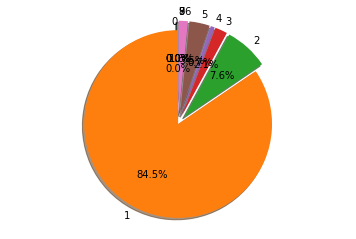

In [6]:
labels = [0,1,2,3,4,5,6,7,8,9]
sizes = data_pie_percentage
explode = (0, 0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  
#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffcc99','#ffcc99','#ffcc99','#ffcc99','#ffcc99','#ffcc99']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [7]:
data_pie_total_amount = data.groupby('Passenger_count').mean()['Fare_amount']

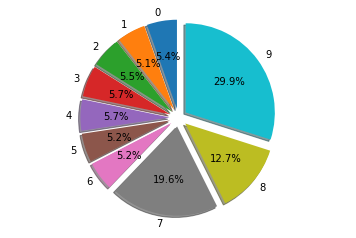

In [8]:
labels = [0,1,2,3,4,5,6,7,8,9]
sizes = data_pie_total_amount
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  
#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffcc99','#ffcc99','#ffcc99','#ffcc99','#ffcc99','#ffcc99']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [9]:
data_pie_trip_distance = data.groupby('Passenger_count').mean()['Trip_distance']

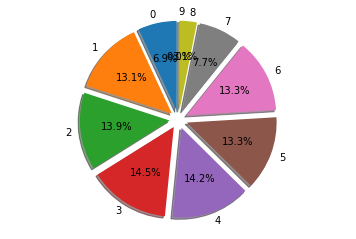

In [10]:
labels = [0,1,2,3,4,5,6,7,8,9]
sizes = data_pie_trip_distance
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## 6) Show me the proportion of missing observations for each column of your data

In [11]:
print(data_pie_percentage[0]/data_pie_percentage.sum())

0.00024773514550168504


## 7) Give me a problem statement.
Below, write a problem statement. Keep in mind that your task is to tease out relationships in your data and eventually build a predictive model. Your problem statement can be vague, but you should have a goal in mind. Your problem statement should be between one sentence and one paragraph.

#### Project goal: Predict tips amount using other features of the trips.

#### Project outline:
* Summarize the characteristics of the trips; explore traffic patterns
   - Distance by pickup/drop-off time: any difference in morning/evening peak?
   - Traffic flow by county
* Develop supervised model to predict the tips amount using other features of the trip.	
   - Data Cleaning
   - Feature engineering
   - Exploratory analysis
   - Modeling
   - Evaluation
* Visualize the results of finding
   - by map


## 8) What is your _y_-variable?

The independent variable will be tip amount. Histogram below shows the distribution of the tip amount variable.


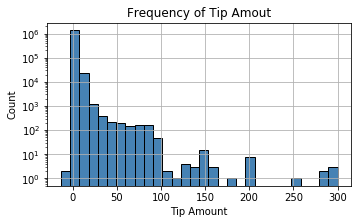

In [12]:
plt.figure(1, figsize=(12, 3))

def plotHistogram(data):
    plt.subplot(121)
    plt.hist(data.Tip_amount,
             bins=30,
             log=True,
             color='steelblue',
             edgecolor='k',)
    plt.xlabel('Tip Amount')
    plt.ylabel('Count')
    plt.grid(True)
    plt.title('Frequency of Tip Amout')

plotHistogram(data)

plt.show() 

In [13]:
# data cleaning

from datetime import timedelta
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

def clean(data):   
    # remove obs with negative tip amount and total fare amount less than 2.5
    data = data[(data.Total_amount>=2.5)]
    
    # remove value with negative value 
    data =  data[(data.Tip_amount>=0) & 
                 (data.Fare_amount>=0) & 
                 (data.improvement_surcharge>=0) &
                 (data.Tolls_amount>=0) & 
                 (data.Extra>=0) & 
                 (data.MTA_tax>=0)]
    
    # encoding
    print(data.select_dtypes(include=['O']).columns)
    data['Store_and_fwd_flag'] = np.where((data.Store_and_fwd_flag=='Y'),1,0)
    
    # missing detect
    #print(data.isnull().sum())
    
    # drop column of NAs
    data = data.drop(columns=['Ehail_fee'],axis=1)
    
    return(data)


data_clean = clean(data)
data_clean.head()

Index(['lpep_pickup_datetime', 'Lpep_dropoff_datetime', 'Store_and_fwd_flag'], dtype='object')


,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2016-06-01 02:46:38,2016-06-01 03:06:40,0,1,-73.930580,40.695179,-74.000053,40.729046,1,5.24,19.5,0.5,0.5,6.24,0.0,0.3,27.04,1,1.0
1,2,2016-06-01 02:55:26,2016-06-01 03:06:52,0,1,-73.946930,40.792553,-73.951569,40.825161,1,3.14,11.5,0.5,0.5,2.56,0.0,0.3,15.36,1,1.0
2,2,2016-06-01 02:50:36,2016-06-01 03:08:39,0,1,-73.944534,40.823956,-73.994659,40.750423,1,7.50,23.5,0.5,0.5,2.00,0.0,0.3,26.80,1,1.0
3,2,2016-06-01 02:57:04,2016-06-01 03:07:52,0,1,-73.952209,40.823872,-73.914360,40.814697,1,2.27,10.5,0.5,0.5,0.00,0.0,0.3,11.80,2,1.0
4,2,2016-06-01 02:52:03,2016-06-01 03:08:12,0,1,-73.957977,40.717827,-73.954018,40.655121,3,4.90,16.5,0.5,0.5,0.00,0.0,0.3,17.80,1,1.0


In [14]:
# import a map of location according to longitude and latitude

#link: https://simplemaps.com/data/us-cities
    
link = "uscities.csv"
city = pd.read_csv(link)

city_ = city[['lat','lng','county_name_all','city','state_name']]
nyc_state = ['New York']

city_ny = city_[city_.state_name.isin(nyc_state)]

nyc_county=['Bronx','Kings','New York','Richmond','Queens']

city_nyc = city_ny[city_ny.county_name_all.isin(nyc_county)]

city_nyc


,lat,lng,county_name_all,city,state_name
9216,40.7498,-73.7976,Queens,Queens,New York
9283,40.8501,-73.8662,Bronx,Bronx,New York
9308,40.7834,-73.9662,New York,Manhattan,New York
9496,40.6501,-73.9496,Kings,Brooklyn,New York
9677,40.5834,-74.1496,Richmond,Staten Island,New York
9730,40.6943,-73.9249,New York,New York,New York


In [15]:
city.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,South Creek,South Creek,WA,Washington,53053,Pierce,53053,Pierce,46.9994,-122.3921,2500.0,125.0,polygon,False,True,America/Los_Angeles,3,98580 98387 98338,1840042075
1,Roslyn,Roslyn,WA,Washington,53037,Kittitas,53037,Kittitas,47.2507,-121.0989,947.0,84.0,polygon,False,True,America/Los_Angeles,3,98941 98068 98925,1840019842
2,Sprague,Sprague,WA,Washington,53043,Lincoln,53043,Lincoln,47.3048,-117.9713,441.0,163.0,polygon,False,True,America/Los_Angeles,3,99032,1840021107
3,Gig Harbor,Gig Harbor,WA,Washington,53053,Pierce,53053,Pierce,47.3352,-122.5968,9507.0,622.0,polygon,False,True,America/Los_Angeles,3,98332 98335,1840019855
4,Lake Cassidy,Lake Cassidy,WA,Washington,53061,Snohomish,53061,Snohomish,48.0639,-122.0920,3591.0,131.0,polygon,False,True,America/Los_Angeles,3,98223 98258 98270,1840041959


In [16]:
# Feature engineering

def features(data):
    
    # create a variable describe Trip time
    data['pickup_time'] = data.Lpep_dropoff_datetime.apply(lambda x:dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
    data['dropoff_time'] = data.Lpep_dropoff_datetime.apply(lambda x:dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

    data['trip_time'] = (data['dropoff_time'] - data['pickup_time']) / timedelta(minutes=1)
    
    # week day
    data['pickup_day'] = data.lpep_pickup_datetime.apply(lambda x:dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S").strftime('%w'))
    
    # create a variable represent average speed
    data['avg_speed'] = round(data.Trip_distance/data.trip_time,2)
    data['avg_speed'] = data['avg_speed'].replace([np.inf, -np.inf], np.nan)
    data['avg_speed'].fillna((data['avg_speed'].mean()), inplace=True)

    return(data)    
    
f_data = features(data_clean)
f_data.head()



,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type,pickup_time,dropoff_time,trip_time,pickup_day,avg_speed
0,2,2016-06-01 02:46:38,2016-06-01 03:06:40,0,1,-73.930580,40.695179,-74.000053,40.729046,1,...,0.0,0.3,27.04,1,1.0,2016-06-01 03:06:40,2016-06-01 03:06:40,0.0,3,NaN
1,2,2016-06-01 02:55:26,2016-06-01 03:06:52,0,1,-73.946930,40.792553,-73.951569,40.825161,1,...,0.0,0.3,15.36,1,1.0,2016-06-01 03:06:52,2016-06-01 03:06:52,0.0,3,NaN
2,2,2016-06-01 02:50:36,2016-06-01 03:08:39,0,1,-73.944534,40.823956,-73.994659,40.750423,1,...,0.0,0.3,26.80,1,1.0,2016-06-01 03:08:39,2016-06-01 03:08:39,0.0,3,NaN
3,2,2016-06-01 02:57:04,2016-06-01 03:07:52,0,1,-73.952209,40.823872,-73.914360,40.814697,1,...,0.0,0.3,11.80,2,1.0,2016-06-01 03:07:52,2016-06-01 03:07:52,0.0,3,NaN
4,2,2016-06-01 02:52:03,2016-06-01 03:08:12,0,1,-73.957977,40.717827,-73.954018,40.655121,3,...,0.0,0.3,17.80,1,1.0,2016-06-01 03:08:12,2016-06-01 03:08:12,0.0,3,NaN


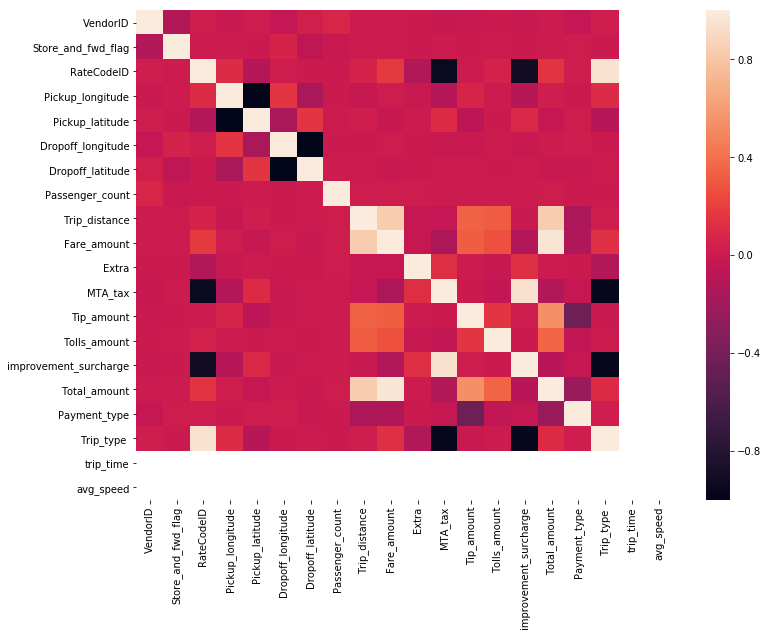

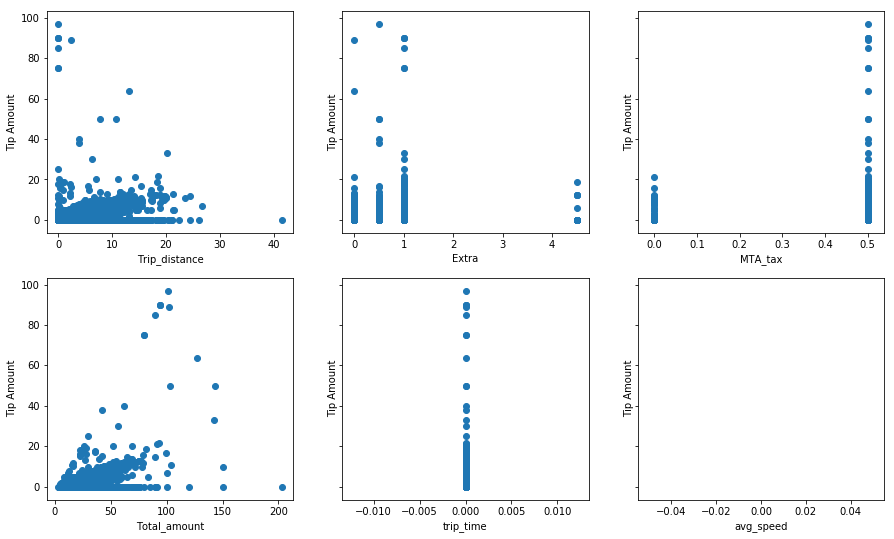

In [17]:
# Heat map
# Scatter plot
def exploratary(data):
    data_clean.corr()
    plt.figure(figsize = (12,9))
    ax=sns.heatmap(data.corr())

    var_list = [['Trip_distance','Extra', 'MTA_tax'],
                ['Total_amount','trip_time','avg_speed']]

    data_pattern = data_clean.head(10000)
    fig, ax = plt.subplots(len(var_list),len(var_list[0]),figsize=(15,9),sharey=True)
    for i in range(len(var_list)): 
        for j in range(len(var_list[i])):      
            ax[i,j].scatter(data_pattern[var_list[i][j]], data_pattern['Tip_amount'])
            ax[i,j].set_xlabel(var_list[i][j])
            ax[i,j].set_ylabel("Tip Amount")
            
            
exploratary(f_data)

In [18]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
#from sklearn import metrics 
from sklearn import cross_validation, metrics 



import warnings
warnings.filterwarnings('ignore')

data_model = f_data.head(50000)

def randomforest(data):
    
    #x = data[['Payment_type','Total_amount','trip_time','avg_speed',
    #Removed avg_speed 
    x = data[['Payment_type','Total_amount','trip_time',
              'Extra', 'Tolls_amount','improvement_surcharge','Passenger_count',
              ]]
    y = data[['Tip_amount']]

    X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

    rf = RandomForestRegressor(n_estimators=100,oob_score=True, random_state=10)
    rf.fit(X_train, y_train.values.ravel())

    predicted_train = rf.predict(X_train)
    predicted_test = rf.predict(X_test)
    test_score = r2_score(y_test, predicted_test)

    print(f'Out-of-bag R2_score estimate: {rf.oob_score_:>5.3}')
    print(f'Test data R2_score: {test_score:>5.3}')
    
    #print("Processing time", dt.datetime.now()-tic)
    return rf.predict(x)
    
y_pred_rf = randomforest(data_model)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Out-of-bag R2_score estimate: 0.638
Test data R2_score: 0.611


In [19]:
f_data.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type,pickup_time,dropoff_time,trip_time,pickup_day,avg_speed
0,2,2016-06-01 02:46:38,2016-06-01 03:06:40,0,1,-73.930580,40.695179,-74.000053,40.729046,1,...,0.0,0.3,27.04,1,1.0,2016-06-01 03:06:40,2016-06-01 03:06:40,0.0,3,NaN
1,2,2016-06-01 02:55:26,2016-06-01 03:06:52,0,1,-73.946930,40.792553,-73.951569,40.825161,1,...,0.0,0.3,15.36,1,1.0,2016-06-01 03:06:52,2016-06-01 03:06:52,0.0,3,NaN
2,2,2016-06-01 02:50:36,2016-06-01 03:08:39,0,1,-73.944534,40.823956,-73.994659,40.750423,1,...,0.0,0.3,26.80,1,1.0,2016-06-01 03:08:39,2016-06-01 03:08:39,0.0,3,NaN
3,2,2016-06-01 02:57:04,2016-06-01 03:07:52,0,1,-73.952209,40.823872,-73.914360,40.814697,1,...,0.0,0.3,11.80,2,1.0,2016-06-01 03:07:52,2016-06-01 03:07:52,0.0,3,NaN
4,2,2016-06-01 02:52:03,2016-06-01 03:08:12,0,1,-73.957977,40.717827,-73.954018,40.655121,3,...,0.0,0.3,17.80,1,1.0,2016-06-01 03:08:12,2016-06-01 03:08:12,0.0,3,NaN
